In [1]:
# A brief about dataset

In [2]:
'''
Driverless cars are getting closer to reality and at a faster pace than ever. But it is still a bit far fetched dream to have 
one in your garage. For the time being, there are still a lot of combustion and hybrid cars that roar around the road, for some
it chills. Though the overall data on sales of automobiles shows a huge drop in sales in the last couple of years, cars are 
still a big attraction for many. Cars are more than just a utility for many. They are often the pride and status of the family.
We all have different tastes when it comes to owning a car or at least when thinking of owning one.

Well here of course as the name suggests we are not concentrating on a new car, rather our interest is in knowing the prices of
used cars across the country whether it is a royal l luxury sedan or a cheap budget utility vehicle. In this hackathon, you 
will be predicting the costs of used cars given the data collected from various sources and distributed across various locations
in India.

Let’s see if your data science skills can help you predict the price of a used car based on a given set of features discussed 
below.

Size of training set: 6,019 records

Size of test set: 1,234 records
'''

'\nDriverless cars are getting closer to reality and at a faster pace than ever. But it is still a bit far fetched dream to have \none in your garage. For the time being, there are still a lot of combustion and hybrid cars that roar around the road, for some\nit chills. Though the overall data on sales of automobiles shows a huge drop in sales in the last couple of years, cars are \nstill a big attraction for many. Cars are more than just a utility for many. They are often the pride and status of the family.\nWe all have different tastes when it comes to owning a car or at least when thinking of owning one.\n\nWell here of course as the name suggests we are not concentrating on a new car, rather our interest is in knowing the prices of\nused cars across the country whether it is a royal l luxury sedan or a cheap budget utility vehicle. In this hackathon, you \nwill be predicting the costs of used cars given the data collected from various sources and distributed across various location

In [3]:
# Importing all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
import sklearn.feature_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from pandas.plotting import scatter_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils import resample
from sklearn.ensemble import IsolationForest

In [5]:
# Importing training dataset

In [2]:
cs=pd.read_excel("C://Users//acer//Desktop//Intern//used_cars//Data_Train.xlsx")

In [7]:
# Importing test dataset

In [8]:
sd=pd.read_excel("C://Users//acer//Desktop//Intern//used_cars//Data_Test.xlsx")

In [9]:
# concating both dataset 

In [10]:
cs=pd.concat([cs,sd],axis=0)

In [11]:
# Looking at first few rows

In [12]:
cs.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50


In [13]:
# last few rows

In [14]:
cs.tail(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
1233,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [15]:
# looking at all columns

In [16]:
cs.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [17]:
# datatypes of all columns

In [18]:
cs.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [19]:
# null values

In [20]:
cs.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [21]:
# size of dataset

In [22]:
cs.shape

(7253, 13)

In [23]:
# basic stats value of dataset

In [24]:
cs.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [25]:
# Data Engineering

In [26]:
# Converting all column names in lower case for easy access

In [27]:
cs.columns=map(str.lower,cs.columns)

In [28]:
# Lets see how our data columns name look like

In [29]:
cs.columns

Index(['name', 'location', 'year', 'kilometers_driven', 'fuel_type',
       'transmission', 'owner_type', 'mileage', 'engine', 'power', 'seats',
       'new_price', 'price'],
      dtype='object')

In [30]:
# name : object

In [31]:
len(cs.name.unique())

2041

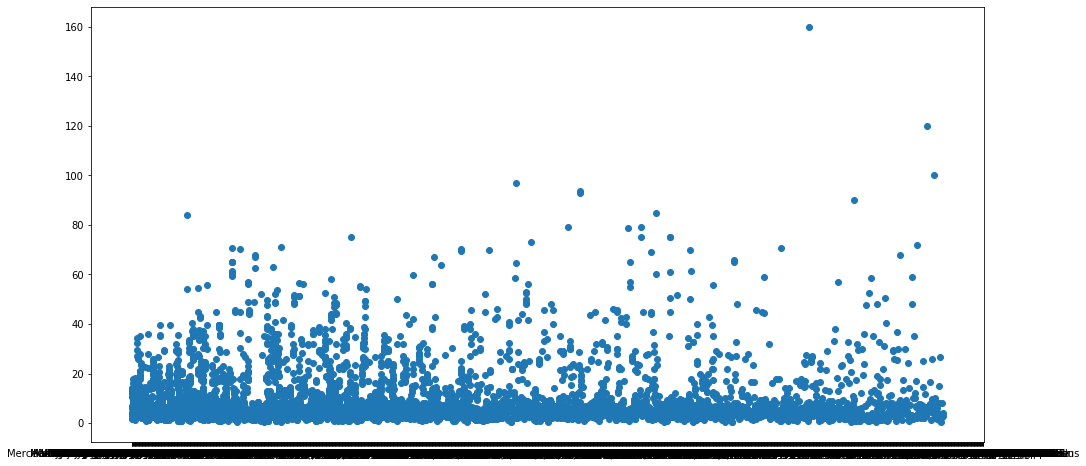

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(cs["name"],cs["price"])

In [33]:
# Lets apply label encoder here

In [34]:
le=LabelEncoder()
cs["name"]=le.fit_transform(cs["name"])

In [35]:
# Location

In [36]:
cs.location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

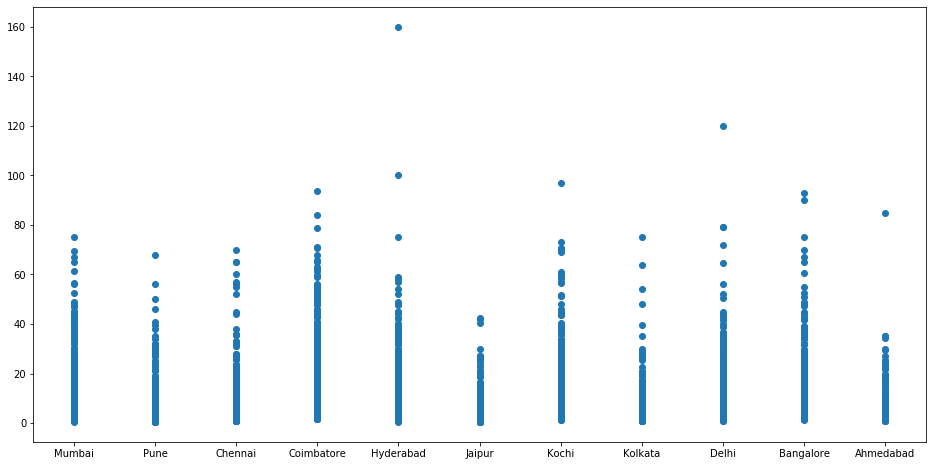

In [37]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(cs["location"],cs["price"])

In [38]:
# Applying Label encoding

In [39]:
le=LabelEncoder()
cs["location"]=le.fit_transform(cs["location"])

In [40]:
# Lets go directly to fuel type as all between variables are numeric and dont have null values

In [41]:
cs.fuel_type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

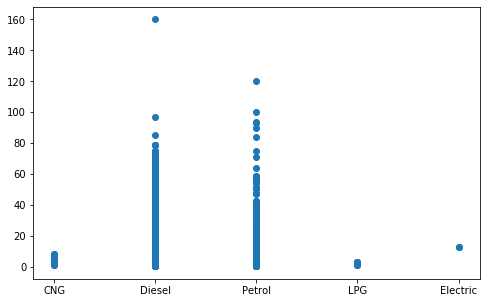

In [42]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(cs["fuel_type"],cs["price"])

In [43]:
# applying one hot encoding here 

In [44]:
fuel=pd.get_dummies(cs["fuel_type"],prefix="fueltype_",drop_first=True)

In [45]:
cs=pd.concat([fuel,cs],axis=1)

In [46]:
cs.drop("fuel_type",axis=1,inplace=True)

In [47]:
# Transmission

In [48]:
cs.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

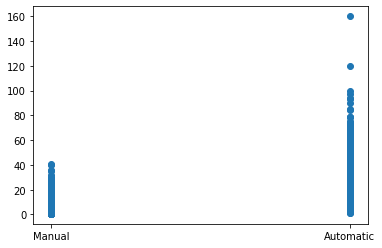

In [49]:
fig,i=plt.subplots(figsize=(6,4))
i.scatter(cs["transmission"],cs["price"])

In [50]:
# OHE to be applied here

In [51]:
trans=pd.get_dummies(cs["transmission"],prefix="trans_",drop_first=True)

In [52]:
cs=pd.concat([trans,cs],axis=1)

In [53]:
cs.drop("transmission",axis=1,inplace=True)

In [54]:
# owner type

In [55]:
cs.owner_type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

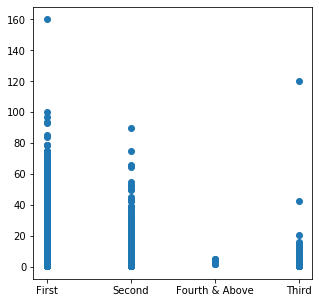

In [56]:
fig,i=plt.subplots(figsize=(5,5))
i.scatter(cs["owner_type"],cs["price"])

In [57]:
owner=pd.get_dummies(cs["owner_type"],prefix="owner_",drop_first=True)

In [58]:
cs=pd.concat([owner,cs],axis=1)

In [59]:
cs.drop("owner_type",axis=1,inplace=True)

In [60]:
# Mileage

In [61]:
# Lets split this column into two different columns to get valuable insights

In [62]:
cs[["mile","param"]]=cs.mileage.str.split(" ",expand=True)

In [63]:
cs.param.unique()

array(['km/kg', 'kmpl', nan], dtype=object)

In [64]:
cs.param=cs.param.fillna(cs.param.value_counts().index[0])

In [65]:
cs.param.unique()

array(['km/kg', 'kmpl'], dtype=object)

In [66]:
# we have to apply ohe

In [67]:
para=pd.get_dummies(cs["param"],prefix="param_",drop_first=False)

In [68]:
cs=pd.concat([cs,para],axis=1)

In [69]:
# removing param and mileage columns

In [70]:
cs.drop("mileage",axis=1,inplace=True)

In [71]:
cs.drop("param",axis=1,inplace=True)

In [72]:
# converting mile col to float

In [73]:
cs["mile"]=pd.to_numeric(cs["mile"])

In [74]:
cs.mile.dtype

dtype('float64')

In [75]:
# engine

In [76]:
cs.engine.head(2)

0     998 CC
1    1582 CC
Name: engine, dtype: object

In [77]:
cs.engine.dtypes

dtype('O')

In [78]:
cs.engine.isna().sum()

46

In [79]:
cs[["engine_cc","cc"]]=cs.engine.str.split(" ",expand=True)

In [80]:
cs.drop("cc",axis=1,inplace=True)

In [81]:
cs.drop("engine",axis=1,inplace=True)

In [82]:
cs.engine_cc.dtypes

dtype('O')

In [83]:
cs["engine_cc"]=pd.to_numeric(cs["engine_cc"])

In [84]:
cs.engine_cc.isna().sum()

46

In [85]:
cs.engine_cc.dtypes

dtype('float64')

In [86]:
cs["engine_cc"].fillna(cs["engine_cc"].mean(),inplace=True)

In [87]:
cs["engine_cc"]=cs["engine_cc"].astype(int)

In [88]:
# power

In [89]:
cs[["power_bhp","bhp"]]=cs["power"].str.split(" ",expand=True)

In [90]:
cs.drop("bhp",axis=1,inplace=True)

In [91]:
cs.drop("power",axis=1,inplace=True)

In [92]:
cs["power_bhp"].replace("np.nan","nan",inplace=True)

In [93]:
cs["power_bhp"].replace("null","nan",inplace=True)

In [94]:
cs["power_bhp"]=cs["power_bhp"].astype(float)

In [95]:
cs.power_bhp.dtypes

dtype('float64')

In [96]:
cs.power_bhp.fillna(cs.power_bhp.mean(),inplace=True)

In [97]:
cs.power_bhp.isna().sum()

0

In [98]:
# seats

In [99]:
cs.seats.isna().sum()

53

In [100]:
cs.seats.fillna(cs.seats.mean(),inplace=True)

In [101]:
cs.seats.isna().sum()

0

In [102]:
cs["seats"]=cs.seats.astype(int)

In [103]:
cs.seats.dtypes

dtype('int32')

In [104]:
# Lets look at the table

In [105]:
cs.head(3)

,owner__Fourth & Above,owner__Second,owner__Third,trans__Manual,fueltype__Diesel,fueltype__Electric,fueltype__LPG,fueltype__Petrol,name,location,year,kilometers_driven,seats,new_price,price,mile,param__km/kg,param__kmpl,engine_cc,power_bhp
0,0,0,0,1,0,0,0,0,1310,9,2010,72000,5,NaN,1.75,26.60,1,0,998,58.16
1,0,0,0,1,1,0,0,0,560,10,2015,41000,5,NaN,12.50,19.67,0,1,1582,126.20
2,0,0,0,1,0,0,0,1,529,2,2011,46000,5,8.61 Lakh,4.50,18.20,0,1,1199,88.70


In [106]:
cs.dtypes

owner__Fourth & Above      uint8
owner__Second              uint8
owner__Third               uint8
trans__Manual              uint8
fueltype__Diesel           uint8
fueltype__Electric         uint8
fueltype__LPG              uint8
fueltype__Petrol           uint8
name                       int32
location                   int32
year                       int64
kilometers_driven          int64
seats                      int32
new_price                 object
price                    float64
mile                     float64
param__km/kg               uint8
param__kmpl                uint8
engine_cc                  int32
power_bhp                float64
dtype: object

In [107]:
cs.new_price.isna().sum()

6247

In [108]:
# as we have 

In [109]:
cs.shape

(7253, 20)

In [110]:
5195/6019*100

86.31001827546105

In [111]:
# as we have null values in new_price close to 87% we are dropping this col from dataset

In [112]:
cs.drop("new_price",axis=1,inplace=True)

In [113]:
# this looks like we have got our final dataset 

In [114]:
cs.head(3)

,owner__Fourth & Above,owner__Second,owner__Third,trans__Manual,fueltype__Diesel,fueltype__Electric,fueltype__LPG,fueltype__Petrol,name,location,year,kilometers_driven,seats,price,mile,param__km/kg,param__kmpl,engine_cc,power_bhp
0,0,0,0,1,0,0,0,0,1310,9,2010,72000,5,1.75,26.60,1,0,998,58.16
1,0,0,0,1,1,0,0,0,560,10,2015,41000,5,12.50,19.67,0,1,1582,126.20
2,0,0,0,1,0,0,0,1,529,2,2011,46000,5,4.50,18.20,0,1,1199,88.70


In [115]:
cs.dtypes

owner__Fourth & Above      uint8
owner__Second              uint8
owner__Third               uint8
trans__Manual              uint8
fueltype__Diesel           uint8
fueltype__Electric         uint8
fueltype__LPG              uint8
fueltype__Petrol           uint8
name                       int32
location                   int32
year                       int64
kilometers_driven          int64
seats                      int32
price                    float64
mile                     float64
param__km/kg               uint8
param__kmpl                uint8
engine_cc                  int32
power_bhp                float64
dtype: object

In [116]:
cs.isna().sum()

owner__Fourth & Above       0
owner__Second               0
owner__Third                0
trans__Manual               0
fueltype__Diesel            0
fueltype__Electric          0
fueltype__LPG               0
fueltype__Petrol            0
name                        0
location                    0
year                        0
kilometers_driven           0
seats                       0
price                    1234
mile                        2
param__km/kg                0
param__kmpl                 0
engine_cc                   0
power_bhp                   0
dtype: int64

In [117]:
# Lets take out our test data out of this set

In [118]:
train=cs.iloc[:6019]

In [119]:
test=cs.iloc[6019:]

In [120]:
test.head(3)

,owner__Fourth & Above,owner__Second,owner__Third,trans__Manual,fueltype__Diesel,fueltype__Electric,fueltype__LPG,fueltype__Petrol,name,location,year,kilometers_driven,seats,price,mile,param__km/kg,param__kmpl,engine_cc,power_bhp
0,0,0,0,1,0,0,0,0,1059,4,2014,40929,4,NaN,32.26,1,0,998,58.2
1,0,1,0,1,0,0,0,1,1049,3,2013,54493,5,NaN,24.70,0,1,796,47.3
2,0,0,0,1,1,0,0,0,1935,9,2017,34000,7,NaN,13.68,0,1,2393,147.8


In [121]:
test.isna().sum()

owner__Fourth & Above       0
owner__Second               0
owner__Third                0
trans__Manual               0
fueltype__Diesel            0
fueltype__Electric          0
fueltype__LPG               0
fueltype__Petrol            0
name                        0
location                    0
year                        0
kilometers_driven           0
seats                       0
price                    1234
mile                        0
param__km/kg                0
param__kmpl                 0
engine_cc                   0
power_bhp                   0
dtype: int64

In [122]:
train.head(3)

,owner__Fourth & Above,owner__Second,owner__Third,trans__Manual,fueltype__Diesel,fueltype__Electric,fueltype__LPG,fueltype__Petrol,name,location,year,kilometers_driven,seats,price,mile,param__km/kg,param__kmpl,engine_cc,power_bhp
0,0,0,0,1,0,0,0,0,1310,9,2010,72000,5,1.75,26.60,1,0,998,58.16
1,0,0,0,1,1,0,0,0,560,10,2015,41000,5,12.50,19.67,0,1,1582,126.20
2,0,0,0,1,0,0,0,1,529,2,2011,46000,5,4.50,18.20,0,1,1199,88.70


In [123]:
train.isna().sum()

owner__Fourth & Above    0
owner__Second            0
owner__Third             0
trans__Manual            0
fueltype__Diesel         0
fueltype__Electric       0
fueltype__LPG            0
fueltype__Petrol         0
name                     0
location                 0
year                     0
kilometers_driven        0
seats                    0
price                    0
mile                     2
param__km/kg             0
param__kmpl              0
engine_cc                0
power_bhp                0
dtype: int64

In [124]:
train.mile.fillna(train.mile.mean(),inplace=True)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [125]:
train.mile.isna().sum()

0

In [126]:
# Dividing dataset into dependent and independent dataset

In [127]:
y=train["price"]
x=train.drop("price",axis=1)

In [128]:
y=y*100000

In [129]:
y=y.astype(int)

In [130]:
# best features using extratrees

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[6.30474325e-04 1.63726737e-02 3.73130743e-03 7.71480954e-03
 1.52607694e-03 1.01067987e-04 2.77223801e-04 1.36192000e-03
 1.65308617e-01 1.50654990e-01 1.35150332e-01 2.53680897e-01
 1.51288971e-02 9.76915626e-02 6.11405034e-04 7.17876110e-04
 5.76649524e-02 9.16749170e-02]


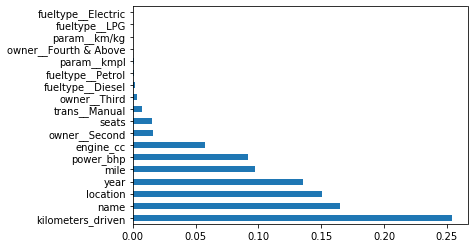

In [131]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(18).plot(kind='barh')
plt.show()

In [132]:
# best features using chi2

In [133]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=18)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_/1000)
dfscores=round(dfscores,2)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(18,'Score'))  #print 10 best features

                    Specs      Score
11      kilometers_driven  263921.86
16              engine_cc     891.15
8                    name     551.20
17              power_bhp     115.55
13                   mile       2.47
9                location       1.85
7        fueltype__Petrol       1.19
1           owner__Second       1.10
4        fueltype__Diesel       1.06
3           trans__Manual       1.02
2            owner__Third       0.99
6           fueltype__LPG       0.95
14           param__km/kg       0.73
5      fueltype__Electric       0.61
0   owner__Fourth & Above       0.51
12                  seats       0.25
10                   year       0.02
15            param__kmpl       0.01


In [134]:
# checking for multi collinearity using vif

In [135]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
print(vif)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


     VIF Factor               features
0      1.011534  owner__Fourth & Above
1      1.126759          owner__Second
2      1.081416           owner__Third
3      1.818595          trans__Manual
4           inf       fueltype__Diesel
5           inf     fueltype__Electric
6      1.184983          fueltype__LPG
7           inf       fueltype__Petrol
8      1.129031                   name
9      1.023358               location
10     1.460186                   year
11     1.054928      kilometers_driven
12     1.764236                  seats
13     2.566285                   mile
14  6017.122343           param__km/kg
15          inf            param__kmpl
16     7.910960              engine_cc
17     6.541216              power_bhp


In [136]:
# Dividing dataset into train test split

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [138]:
# Printing the shape of splitted dataset

In [139]:
print("shape of x_train is:",x_train.shape)
print("shape of y_train is:",y_train.shape)
print("shape of x_test is:",x_test.shape)
print("shape of y_test is:",y_test.shape)

shape of x_train is: (4213, 18)
shape of y_train is: (4213,)
shape of x_test is: (1806, 18)
shape of y_test is: (1806,)


In [140]:
# Lets app;y ML algo and see which result best

In [141]:
lr=LinearRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)

In [142]:
prediction=prediction.astype(int)

In [143]:
prediction

array([ 354608, 1374922, 1294827, ...,  378354,  843549,  695288])

In [144]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

       Actual  Predicted
2868   575000     354608
5924  1008000    1374922
3764   785000    1294827
4144   240000     505081
2780   160000     501657
...       ...        ...
2576   947000    2135113
1294   320000     484049
1876   425000     378354
1432   648000     843549
3926   591000     695288

[1806 rows x 2 columns]


In [145]:
# Evaluating model prediction

In [146]:
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))
print("variance score: %.2f" % lr.score(x_test,y_test))
print("Residual sum of squares: %.2f"
  % ((lr.predict(x_test) - y_test) ** 2).sum())
print('Slope:' ,lr.coef_)
print('Intercept:', lr.intercept_)
print("R2 score is:",r2_score(y_test,prediction)*100)

mean abs error: 391551.4772978959
mean sq error: 67185100.86157253
root mean sq error: 8196.651807998955
variance score: 0.56
Residual sum of squares: 985554570629206.25
Slope: [ 1.50978942e+05  1.67379726e+03  1.09938724e+05 -2.28857897e+05
 -1.64937391e+05  6.34074179e+05  1.36741584e+05 -4.38641006e+05
  9.11219114e+00 -2.12490000e+04  9.37787444e+04 -2.34401997e+00
 -1.16301616e+05 -1.94364074e+04 -3.04957833e+04  3.04957833e+04
  1.43954757e+02  1.21869628e+04]
Intercept: -187847201.06701222
R2 score is: 99.99453773751456


In [147]:
# giving summary of result

In [148]:
model=sm.ols(formula=(y_test,x_test) ,data=train)
fitted=model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     259.5
Date:                Thu, 20 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:59:15   Log-Likelihood:                -26617.
No. Observations:                1806   AIC:                         5.327e+04
Df Residuals:                    1789   BIC:                         5.336e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
owner__Fourth & Above  7.944e+04    3.1e+05      0.256      0.798   -5.29e+05    6.88e+05
owner__Second         -1.214e+05   4.16e+04     -2.921      0.004   -2.03e+05   -3.99e+04
owner__Third           8.208e+04   1.17e+05      0.703      0.482   -1.47e+05    3.11e+05
trans__Manual         -3.337e+05   4.31e+04     -7.744      0.000   -4.18e+05   -2.49e+05
fueltype__Diesel      -4.896e+07   2.61e+06    -18.766      0.000   -5.41e+07   -4.38e+07
fueltype__Electric    -4.829e+07   2.63e+06    -18.357      0.000   -5.34e+07   -4.31e+07
fueltype__LPG          1.658e+05   4.57e+05      0.362      0.717   -7.31e+05    1.06e+06
fueltype__Petrol       -4.92e+07   2.61e+06    -18.853      0.000   -5.43e+07   -4.41e+07
name                     17.9976     26.476      0.680      0.497     -33.929      69.924
location              -2.115e+04   4930.077     -4.289      0.000   -3.08e+04   -1.15e+04
year                   9.744e+04   5190.578     18.772      0.000    8.73e+04    1.08e+05
kilometers_driven         0.3422      0.093      3.673      0.000       0.159       0.525
seats                 -9.937e+04   2.26e+04     -4.389      0.000   -1.44e+05    -5.5e+04
mile                  -1.825e+04   4787.365     -3.812      0.000   -2.76e+04   -8861.399
param__km/kg          -1.954e+08   1.04e+07    -18.773      0.000   -2.16e+08   -1.75e+08
param__kmpl           -1.464e+08    7.8e+06    -18.774      0.000   -1.62e+08   -1.31e+08
engine_cc                99.4177     67.769      1.467      0.143     -33.497     232.332
power_bhp              1.166e+04    701.081     16.629      0.000    1.03e+04     1.3e+04
==============================================================================
Omnibus:                      905.821   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18819.911
Skew:                           1.871   Prob(JB):                         0.00
Kurtosis:                      18.365   Cond. No.                     1.62e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.94e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [149]:
# Plotting prediction vs actual values 